In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [12]:
base_dir = './data/Cropped Dataset/'
# uncomment the following line to use non-pre-processed data
# base_dir = './data/New Masks Dataset/'
train_dir = base_dir + 'Train/'
val_dir = base_dir + 'Validation/'
test_dir = base_dir + 'Test/'
batch_size = 32

data_gen_args_base = dict(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = False
)

# training data
train_data_generator = ImageDataGenerator(**data_gen_args_base)
train_set = train_data_generator.flow_from_directory(directory=train_dir,
                                                        target_size=(128, 128),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

# validation data
val_data_generator = ImageDataGenerator(**data_gen_args_base)
val_set = val_data_generator.flow_from_directory(directory=val_dir,
                                                        target_size=(128, 128),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

# test data
test_data_generator = ImageDataGenerator(**data_gen_args_base)
test_set = test_data_generator.flow_from_directory(directory=test_dir,
                                                    target_size=(128, 128),
                                                    batch_size=batch_size,
                                                    class_mode='binary')


Found 1830 images belonging to 2 classes.
Found 1098 images belonging to 2 classes.
Found 659 images belonging to 2 classes.


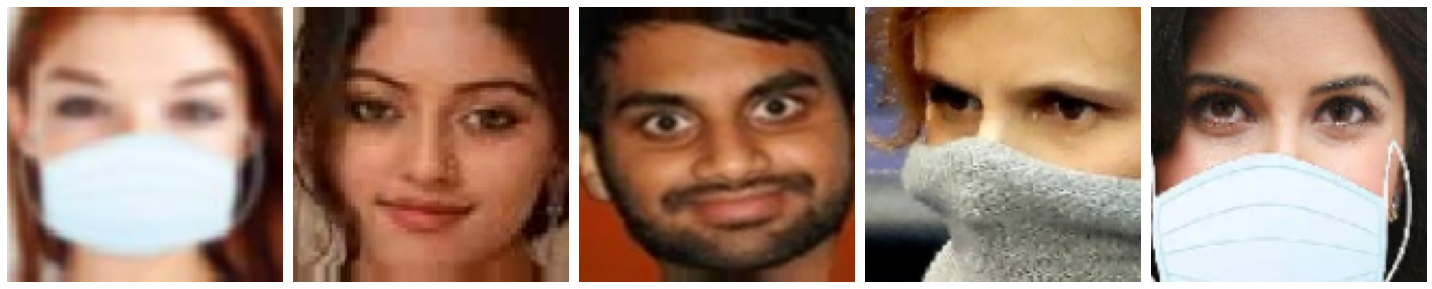

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_set)
plotImages(sample_training_images[:5])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, Flatten, MaxPool2D, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
INPUT_SHAPE = train_set.image_shape

cnn = Sequential()
cnn.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu",input_shape=INPUT_SHAPE))
cnn.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"))
cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))
cnn.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
cnn.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))
cnn.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))
cnn.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
cnn.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=1024,activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=1,activation="sigmoid"))
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [16]:
early_stop = EarlyStopping(monitor="val_loss",patience=4,mode="min") #Ensure the model doesn't overfit

In [17]:
history = cnn.fit(x=train_set, batch_size=batch_size, epochs=20, callbacks=early_stop, validation_data=val_set)

Epoch 1/20
58/58 [==============================] - 86s 1s/step - loss: 0.2993 - accuracy: 0.8760 - val_loss: 0.1652 - val_accuracy: 0.9226
Epoch 2/20
58/58 [==============================] - 85s 1s/step - loss: 0.0925 - accuracy: 0.9776 - val_loss: 0.2297 - val_accuracy: 0.9617
Epoch 3/20
58/58 [==============================] - 85s 1s/step - loss: 0.0853 - accuracy: 0.9798 - val_loss: 0.1789 - val_accuracy: 0.9718
Epoch 4/20
58/58 [==============================] - 86s 1s/step - loss: 0.0716 - accuracy: 0.9852 - val_loss: 0.1111 - val_accuracy: 0.9809
Epoch 5/20
58/58 [==============================] - 85s 1s/step - loss: 0.0832 - accuracy: 0.9803 - val_loss: 0.0879 - val_accuracy: 0.9800
Epoch 6/20
58/58 [==============================] - 88s 2s/step - loss: 0.2204 - accuracy: 0.9557 - val_loss: 0.1721 - val_accuracy: 0.9672
Epoch 7/20
58/58 [==============================] - 85s 1s/step - loss: 0.0967 - accuracy: 0.9787 - val_loss: 0.1116 - val_accuracy: 0.9791
Epoch 8/20
58/58 [==

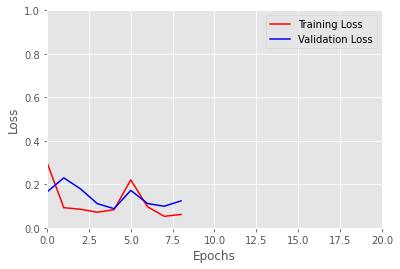

In [18]:
plt.xlim(0, 20)
plt.ylim(0,1)

plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

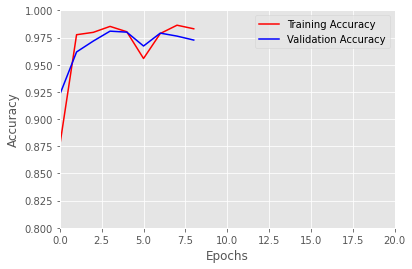

In [19]:
plt.xlim(0, 20)
plt.ylim(0.8,1)

plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
result = cnn.evaluate(test_set)
dict(zip(cnn.metrics_names, result))

21/21 [==============================] - 5s 226ms/step - loss: 0.2311 - accuracy: 0.9499


{'loss': 0.231143519282341, 'accuracy': 0.949924111366272}